In [ ]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
df, meta = pyreadstat.read_dta('DM_FKRTL_Sudah_Bobot.dta')
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKL02,FKL03,FKL04,FKL05,FKL06,FKL07,...,PSTV11,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,FKL24,FKL24A,FKL24B
0,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,7.0,2.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus
1,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,7.0,2.0,94.0,9403.0,2021.0,1.0,NaN,I10,I10,I10 Essential (primary) hypertension
2,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,7.0,2.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease
3,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,3.0,1.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus
4,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,3.0,1.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease


In [ ]:
# Membuat Column Tahun Feature Engineering

In [ ]:
df['FKL03'] = pd.to_datetime(df['FKL03'])
df['FKL04'] = pd.to_datetime(df['FKL04'])

In [ ]:
df['Tahun'] = df['FKL03'].dt.strftime('%Y')

In [ ]:
df['Tahun'].unique()

array(['2021'], dtype=object)

In [ ]:
df_cats = pd.DataFrame()
df_nums = pd.DataFrame()

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df_cats[column] = df[column]
    elif df[column].dtype == 'float64':
        df_nums[column] = df[column]

# Tujuan

1. kita cari rata2 biaya yang dibutuhkan di setiap pelayanan fkrtl
2. berapa persen dari keluarga yang menderita penyakit yang sama
3. kelas rawat dan status kesembuhan(status kepulangan)
4. distribusi kelas rawat berdasarkan segmentasi peserta
5. rata2 lama peserta dirawat (tanggal paling awal berkunjung - tanggal paling akhir pulang (range))
6. sub_akut dan tarif
7. Distribusi Special Drugs yang digunakan ke pasien
8. Distribusi Spesial Prosedur dan Tarifnya
9.


## 1. Rata-Rata Biaya yang dibutuhkan di setiap pelayanan FKRTL

In [ ]:
# prosedur dan biaya
df_biaya = df.groupby(['FKL30','FKL47']).size().reset_index(name = "count")
df_biaya = df_biaya.sort_values('count', ascending = False)
df_biaya

,FKL30,FKL47,count
158,,190400.0,155887
163,,192400.0,60028
135,,183300.0,59793
161,,192100.0,49259
142,,185000.0,47917
...,...,...,...
25184,"8909 - Consultation, not otherwise specified;8...",211200.0,1
25185,"8909 - Consultation, not otherwise specified;8...",221800.0,1
11774,8611 - Biopsy of skin and subcutaneous tissue,3439800.0,1
25189,"8909 - Consultation, not otherwise specified;8...",213100.0,1


### mengganti df_biaya yang kosong dengan nan_values

In [ ]:
df_biaya['FKL30'] = df_biaya['FKL30'].replace(r'^\s*$', np.NaN, regex=True)
df_biaya.dropna()

,FKL30,FKL47,count
28555,9059 - Other microscopic examination of blood,190400.0,42995
6839,3995 - Hemodialysis,825500.0,14243
28539,9059 - Other microscopic examination of blood,183300.0,12521
28535,9059 - Other microscopic examination of blood,181400.0,11392
6849,3995 - Hemodialysis,923100.0,11359
...,...,...,...
11777,8611 - Biopsy of skin and subcutaneous tissue;...,2816700.0,1
25184,"8909 - Consultation, not otherwise specified;8...",211200.0,1
25185,"8909 - Consultation, not otherwise specified;8...",221800.0,1
11774,8611 - Biopsy of skin and subcutaneous tissue,3439800.0,1


In [ ]:
df_jumlah_biaya = df_biaya.groupby(['FKL30']).agg({'FKL47' : 'sum', 'count' : 'sum'}).reset_index()
df_jumlah_biaya = df_jumlah_biaya.sort_values('count', ascending = False)
df_jumlah_biaya['mean'] = df_jumlah_biaya['FKL47'] / df_jumlah_biaya['count']
top_10_biaya_layanan = df_jumlah_biaya.head(10)
top_10_biaya_layanan = top_10_biaya_layanan.sort_values('mean', ascending = False)
top_10_biaya_layanan

,FKL30,FKL47,count,mean
12162,8952 - Electrocardiogram,964674300.0,9573,100770.322783
14130,9339 - Other physical therapy,109764600.0,8357,13134.450162
2705,3995 - Hemodialysis,808227600.0,73248,11034.125164
14165,9357 - Application of other wound dressing,69812600.0,8136,8580.703048
12782,9059 - Other microscopic examination of blood,949185700.0,135981,6980.281804
12529,897 - General physical examination,24010000.0,9809,2447.752064
11555,8908 - Other consultation,12247400.0,8010,1529.013733
11179,"8907 - Consultation, described as comprehensive",13072700.0,9628,1357.779393
14049,9334 - Diathermy;9339 - Other physical therapy,9342900.0,7175,1302.146341
11678,"8909 - Consultation, not otherwise specified",14604300.0,11717,1246.419732


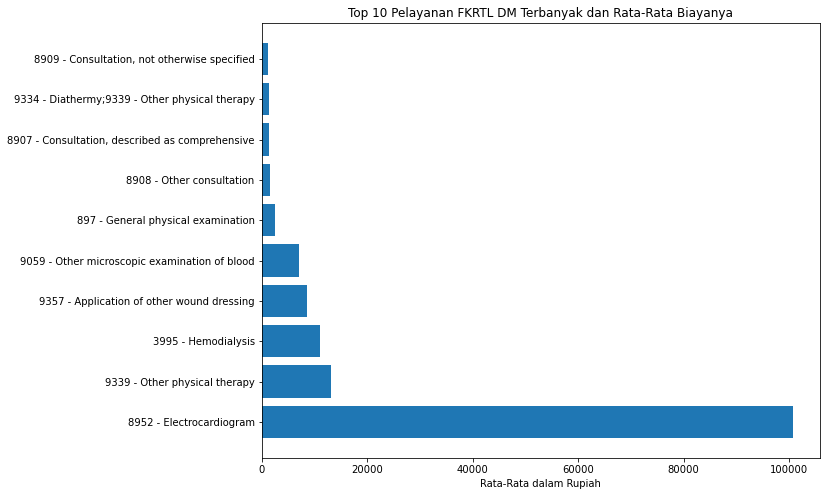

In [ ]:
# Plotting
plt.figure(figsize=(10,8))

x = top_10_biaya_layanan['FKL30']
y = top_10_biaya_layanan['mean']

plt.barh(x,y)
plt.title('Top 10 Pelayanan FKRTL DM Terbanyak dan Rata-Rata Biayanya')
plt.xlabel('Rata-Rata dalam Rupiah')
plt.show()

# 2. Sepuluh Diagnosis Masuk Terbanyak pada FKRTL TB

In [ ]:
df_diagnosis_masuk = df.groupby(['FKL16','FKL16A']).size().reset_index(name = 'count')
df_diagnosis_masuk = df_diagnosis_masuk.sort_values('count', ascending = False)
df_diagnosis_masuk = df_diagnosis_masuk.reset_index()
df_diagnosis_masuk.head(10)

,index,FKL16,FKL16A,count
0,753,E118,Non-insulin-dependent diabetes mellitus with u...,109235
1,4286,Z098,Follow-up examination after other treatment fo...,98460
2,752,E117,Non-insulin-dependent diabetes mellitus with m...,51379
3,751,E116,Non-insulin-dependent diabetes mellitus with o...,47705
4,1699,I500,Congestive heart failure,33351
5,749,E114,Non-insulin-dependent diabetes mellitus with n...,32299
6,3243,N18,Chronic kidney disease,31240
7,3249,N185,"Chronic kidney disease, stage 5",31093
8,742,E108,Insulin-dependent diabetes mellitus with unspe...,27573
9,1739,I64,"Stroke, not specified as haemorrhage or infarc...",22050


In [ ]:
# drop kolom yang valuenya kosong
df_diagnosis_masuk = df_diagnosis_masuk.drop(labels = [1])
top_diagnosis_masuk = df_diagnosis_masuk.head(10)
top_diagnosis_masuk

,index,FKL16,FKL16A,count
0,753,E118,Non-insulin-dependent diabetes mellitus with u...,109235
2,752,E117,Non-insulin-dependent diabetes mellitus with m...,51379
3,751,E116,Non-insulin-dependent diabetes mellitus with o...,47705
4,1699,I500,Congestive heart failure,33351
5,749,E114,Non-insulin-dependent diabetes mellitus with n...,32299
6,3243,N18,Chronic kidney disease,31240
7,3249,N185,"Chronic kidney disease, stage 5",31093
8,742,E108,Insulin-dependent diabetes mellitus with unspe...,27573
9,1739,I64,"Stroke, not specified as haemorrhage or infarc...",22050
10,1580,I11,Hypertensive heart disease,21076


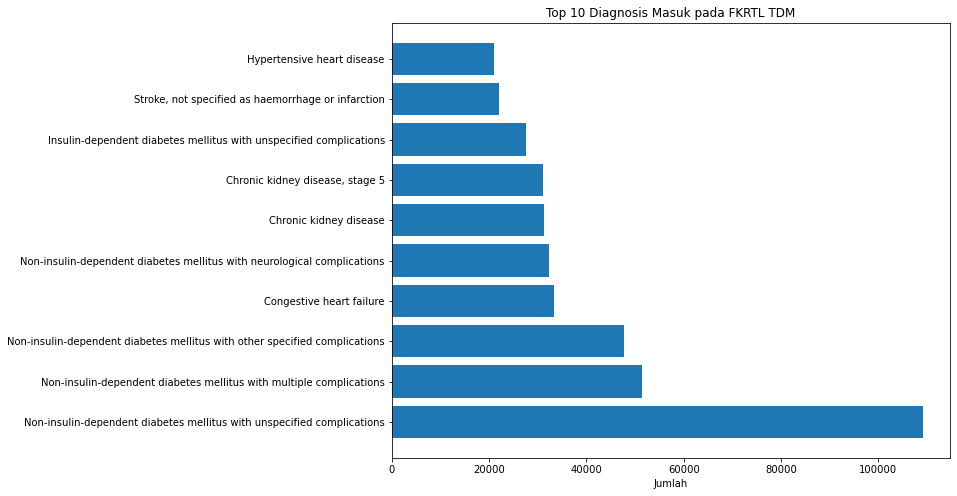

In [ ]:
# plotting bar
plt.figure(figsize=(10,8))

x = top_diagnosis_masuk['FKL16A']
y = top_diagnosis_masuk['count']

plt.barh(x,y)
plt.title('Top 10 Diagnosis Masuk pada FKRTL TDM')
plt.xlabel('Jumlah')
plt.show()

# 3. kelas rawat dan status kesembuhan(status kepulangan)

## bentuk pie chart tentang perbandingan pasien kelas rawat

In [ ]:
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKL02,FKL03,FKL04,FKL05,FKL06,FKL07,...,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,FKL24,FKL24A,FKL24B,Tahun
0,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus,2021
1,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,I10,I10,I10 Essential (primary) hypertension,2021
2,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease,2021
3,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,1.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus,2021
4,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,1.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease,2021


In [ ]:
dict_fkl14 = {
    1.0 : 'Sehat',
    2.0 : 'Rujuk',
    3.0 : 'Meninggal',
    4.0 : 'Pulang Paksa',
    5.0 : 'Tidak Tahu'
}

df['FKL14'] = df['FKL14'].map(dict_fkl14)

In [ ]:
df_status = df.groupby(['FKL13','FKL14']).size().reset_index(name = "count")
df_status.sort_values('count', ascending = False)

,FKL13,FKL14,count
13,3.0,Sehat,1130410
14,3.0,Tidak Tahu,27173
3,1.0,Sehat,17964
12,3.0,Rujuk,11932
8,2.0,Sehat,7871
10,3.0,Meninggal,2513
0,1.0,Meninggal,2217
5,2.0,Meninggal,1003
11,3.0,Pulang Paksa,682
2,1.0,Rujuk,527


In [ ]:
# Kelas 1

In [ ]:
df_status_1 = df_status[df_status['FKL13'] == 1.0]

In [ ]:
df_status_1 = df_status_1.sort_values('count', ascending = False)
df_status_1

,FKL13,FKL14,count
3,1.0,Sehat,17964
0,1.0,Meninggal,2217
2,1.0,Rujuk,527
1,1.0,Pulang Paksa,232
4,1.0,Tidak Tahu,44


Text(0.5, 1.0, 'Distribusi Status Kepulangan untuk Kelas Rawat 1')

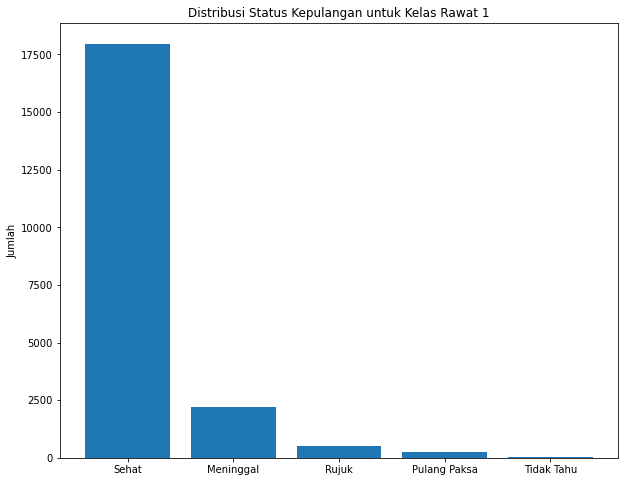

In [ ]:
# Plotting
plt.figure(figsize = (10,8))

x = df_status_1['FKL14']
y = df_status_1['count']


plt.bar(x,y)
plt.ylabel('Jumlah')
plt.title('Distribusi Status Kepulangan untuk Kelas Rawat 1')

In [ ]:
# Assuming df_status['count'] is a list or a pandas Series
total_counts = sum(df_status['count'][0:5])  # Sum of count[0], count[1], count[2], and count[3]
df_status_1_m = df_status['count'][0] / total_counts
df_status_1_m = df_status_1_m * 100
df_status_1_m

10.565192527640106

In [ ]:
# Kelas Rawat 2

In [ ]:
df_status_2 = df_status[df_status['FKL13'] == 2.0]

In [ ]:
df_status_2 = df_status_2.reset_index()
df_status_2 = df_status_2.sort_values('count', ascending = False)
df_status_2

,index,FKL13,FKL14,count
3,8,2.0,Sehat,7871
0,5,2.0,Meninggal,1003
2,7,2.0,Rujuk,184
1,6,2.0,Pulang Paksa,128
4,9,2.0,Tidak Tahu,30


Text(0.5, 1.0, 'Distribusi Status Kepulangan untuk Kelas Rawat 2')

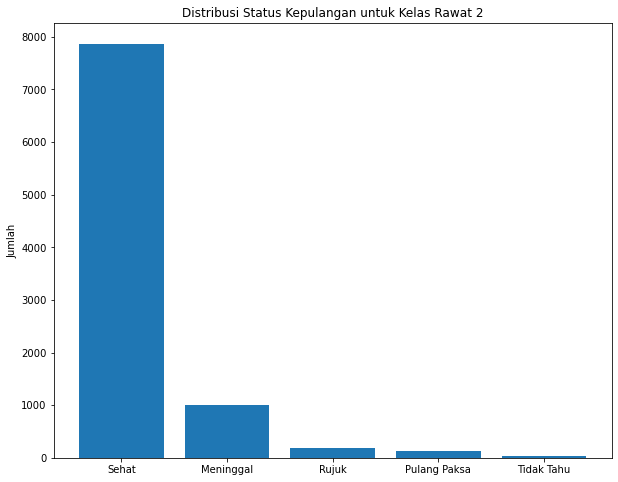

In [ ]:
# Plotting
plt.figure(figsize = (10,8))

x = df_status_2['FKL14']
y = df_status_2['count']


plt.bar(x,y)
plt.ylabel('Jumlah')
plt.title('Distribusi Status Kepulangan untuk Kelas Rawat 2')

In [ ]:
# Assuming df_status['count'] is a list or a pandas Series
total_counts = sum(df_status_2['count'][0:5])  # Sum of count[0], count[1], count[2], count[3], and count[4]
df_status_2_m = df_status_2['count'][0] / total_counts
df_status_2_m = df_status_2_m * 100
df_status_2_m

10.883246527777777

In [ ]:
# Kelas Rawat 3

In [ ]:
df_status_3 = df_status[df_status['FKL13'] == 3.0]
df_status_3 = df_status_3.reset_index()
df_status_3 = df_status_3.sort_values('count', ascending = False)
df_status_3

,index,FKL13,FKL14,count
3,13,3.0,Sehat,1130410
4,14,3.0,Tidak Tahu,27173
2,12,3.0,Rujuk,11932
0,10,3.0,Meninggal,2513
1,11,3.0,Pulang Paksa,682


In [ ]:
# Assuming df_status['count'] is a list or a pandas Series
total_counts = sum(df_status_3['count'][0:5])  # Sum of count[0], count[1], count[2], count[3], and count[4]
df_status_3_m = df_status_3['count'][0] / total_counts
df_status_3_m = df_status_3_m * 100
df_status_3_m

0.21428997791440338

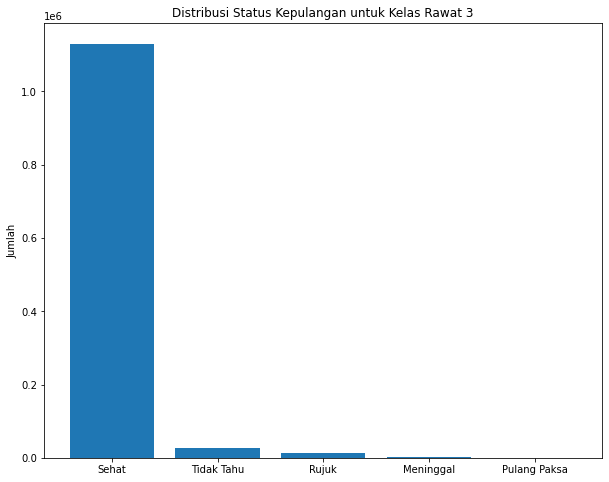

In [ ]:
# Plotting
plt.figure(figsize = (10,8))

x = df_status_3['FKL14']
y = df_status_3['count']


plt.bar(x,y)
plt.ylabel('Jumlah')
plt.title('Distribusi Status Kepulangan untuk Kelas Rawat 3')
plt.show()

In [ ]:
df_mortality = pd.DataFrame()

In [ ]:
df_mortality['class'] = [1,2,3]

In [ ]:
df_mortality['mortality_rate'] = [6.73682958734689, 6.2015503875969, 0.45137338078728967]

In [ ]:
df_mortality['mortality'] = [2266, 1904, 6761]

In [ ]:
df_mortality

,class,mortality_rate,mortality
0,1,6.736830,2266
1,2,6.201550,1904
2,3,0.451373,6761


Text(0.5, 1.0, 'Perbandingan Kelas Rawat dengan Mortality Rate')

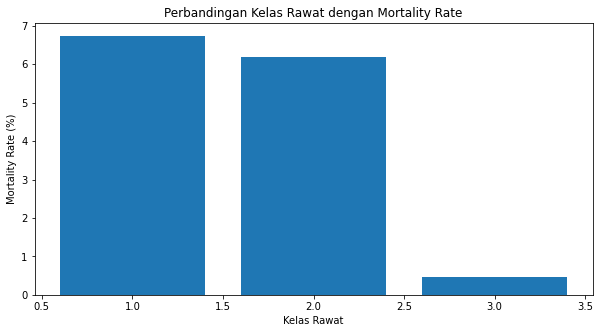

In [ ]:
plt.figure(figsize=(10,5))

x = df_mortality['class']
y = df_mortality['mortality_rate']

plt.bar(x,y)
plt.xlabel("Kelas Rawat")
plt.ylabel("Mortality Rate (%)")
plt.title("Perbandingan Kelas Rawat dengan Mortality Rate")

Text(0.5, 1.0, 'Perbandingan Kelas Rawat dengan Jumlah Kematian')

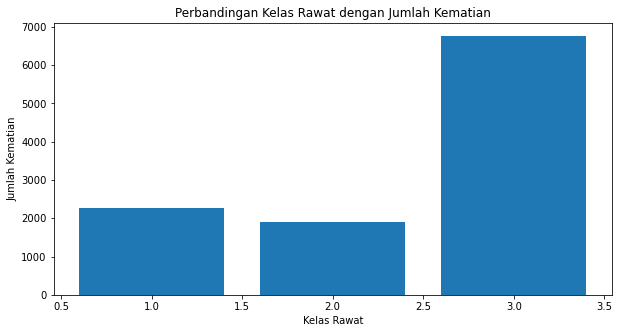

In [ ]:
plt.figure(figsize=(10,5))

x = df_mortality['class']
y = df_mortality['mortality']

plt.bar(x,y)
plt.xlabel("Kelas Rawat")
plt.ylabel("Jumlah Kematian")
plt.title("Perbandingan Kelas Rawat dengan Jumlah Kematian")

# 4. distribusi kelas rawat berdasarkan segmentasi peserta

In [ ]:
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKL02,FKL03,FKL04,FKL05,FKL06,FKL07,...,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18,FKL24,FKL24A,FKL24B,Tahun
0,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus,2021
1,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,I10,I10,I10 Essential (primary) hypertension,2021
2,83764474.0,78786996.0,1.674967,,100080121V000024,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,2.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease,2021
3,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,1.0,94.0,9403.0,2021.0,1.0,NaN,E119,E11,E11 Type 2 diabetes mellitus,2021
4,32064934.0,32064934.0,1.625999,,100080121V000078,2021-01-04,2021-01-04,94.0,9403.0,3.0,...,1.0,94.0,9403.0,2021.0,1.0,NaN,I693,I69,I69 Sequelae of cerebrovascular disease,2021


In [ ]:
df.groupby(['FKL12','FKL13']).size().reset_index(name = "count")

,FKL12,FKL13,count
0,1.0,1.0,7395
1,1.0,2.0,2623
2,1.0,3.0,276467
3,2.0,1.0,2
4,2.0,2.0,4
5,2.0,3.0,93945
6,3.0,1.0,3
7,3.0,2.0,8
8,3.0,3.0,114263
9,4.0,1.0,3935


In [ ]:
dictfkl12 = {
    1.0: 'Bukan pekerja',
    2.0: 'PBI APBN',
    3.0: 'PBI APBD',
    4.0: 'PBPU',
    5.0: 'PPU'
}

dictfkl13 = {
    1.0 : 'Kelas 1',
    2.0 : 'Kelas 2',
    3.0 : 'Kelas 3'
}

In [ ]:
df['FKL12'] = df['FKL12'].map(dictfkl12)

In [ ]:
df['FKL13'] = df['FKL13'].map(dictfkl13)

In [ ]:
df_kr = df.groupby(['FKL12','FKL13']).size().reset_index(name = "count")
df_kr

'''
FKL12
1	Bukan pekerja
2	PBI APBN
3	PBI APBD
4	PBPU
5	PPU
'''
df_kr

,FKL12,FKL13,count
0,Bukan pekerja,Kelas 1,7395
1,Bukan pekerja,Kelas 2,2623
2,Bukan pekerja,Kelas 3,276467
3,PBI APBD,Kelas 1,3
4,PBI APBD,Kelas 2,8
5,PBI APBD,Kelas 3,114263
6,PBI APBN,Kelas 1,2
7,PBI APBN,Kelas 2,4
8,PBI APBN,Kelas 3,93945
9,PBPU,Kelas 1,3935


In [ ]:
# filter condition
# kelas 1
df_kelas_1 = df_kr[df_kr['FKL13'] == 'Kelas 1']
df_kelas_1

,FKL12,FKL13,count
0,Bukan pekerja,Kelas 1,7395
3,PBI APBD,Kelas 1,3
6,PBI APBN,Kelas 1,2
9,PBPU,Kelas 1,3935
12,PPU,Kelas 1,9649


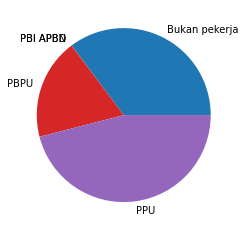

In [ ]:
y = df_kelas_1['count']
mylabels = df_kelas_1['FKL12']

plt.pie(y, labels = mylabels)
plt.show()

In [ ]:
# kelas 2

df_kelas_2 = df_kr[df_kr['FKL13'] == 'Kelas 2']
df_kelas_2

,FKL12,FKL13,count
1,Bukan pekerja,Kelas 2,2623
4,PBI APBD,Kelas 2,8
7,PBI APBN,Kelas 2,4
10,PBPU,Kelas 2,3291
13,PPU,Kelas 2,3290


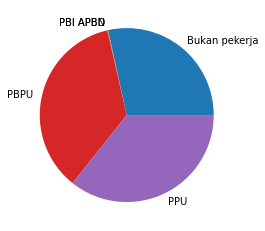

In [ ]:
y = df_kelas_2['count']
mylabels = df_kelas_2['FKL12']

plt.pie(y, labels = mylabels)
plt.show()

In [ ]:
# kelas 3

df_kelas_3 = df_kr[df_kr['FKL13'] == 'Kelas 3']
df_kelas_3

,FKL12,FKL13,count
2,Bukan pekerja,Kelas 3,276467
5,PBI APBD,Kelas 3,114263
8,PBI APBN,Kelas 3,93945
11,PBPU,Kelas 3,402702
14,PPU,Kelas 3,285333


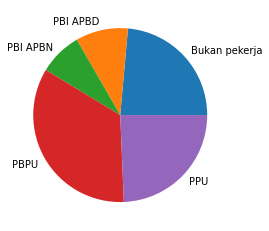

In [ ]:
y = df_kelas_3['count']
mylabels = df_kelas_3['FKL12']

plt.pie(y, labels = mylabels)
plt.show()

# 5. rata2 lama peserta dirawat (tanggal paling awal berkunjung - tanggal paling akhir pulang (range))

In [ ]:
df_lama_peserta = df.groupby(['FKL02','FKL03','FKL04']).size().reset_index(name = "count")
df_lama_peserta

,FKL02,FKL03,FKL04,count
0,100080121V000024,2021-01-04,2021-01-04,3
1,100080121V000078,2021-01-04,2021-01-04,3
2,100080121V000236,2021-01-07,2021-01-07,2
3,100080121V000243,2021-01-07,2021-01-07,2
4,100080121V000320,2021-01-08,2021-01-08,3
...,...,...,...,...
737559,99591121V000008,2021-11-01,2021-11-01,1
737560,99591121V000166,2021-11-24,2021-11-24,1
737561,99591121V000211,2021-11-27,2021-11-28,1
737562,99591221V000057,2021-12-07,2021-12-07,1


In [ ]:
# Assuming you have a DataFrame named df_lama_peserta
df_lama_peserta['FKL03'] = pd.to_datetime(df_lama_peserta['FKL03'])


In [ ]:
# Assuming you have a DataFrame named df_lama_peserta
df_lama_peserta['FKL04'] = pd.to_datetime(df_lama_peserta['FKL04'])


In [ ]:
df_lama_peserta['range'] = df_lama_peserta['FKL04'] - df_lama_peserta['FKL03']
df_1 = df_lama_peserta[df_lama_peserta['range'] > '0 days']

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24859 entries, 40 to 737561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   FKL02   24859 non-null  object         
 1   FKL03   24859 non-null  datetime64[ns] 
 2   FKL04   24859 non-null  datetime64[ns] 
 3   count   24859 non-null  int64          
 4   range   24859 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.1+ MB


In [ ]:
df_1['range'].describe()

count                        24859
mean     4 days 16:40:37.555814795
std      3 days 19:25:31.743090812
min                1 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                6 days 00:00:00
max               67 days 00:00:00
Name: range, dtype: object

In [ ]:
df_1['range'].mean()

Timedelta('4 days 16:40:37.555814795')

# 6.sub akut dan tarif

In [ ]:
df_sub_akut = df.groupby(['FKL33','FKL34']).size().reset_index(name = "count")
df_sub_akut = df_sub_akut.sort_values('count', ascending = False)
df_sub_akut

,FKL33,FKL34,count
0,,0.0,1195385
1,NONE,0.0,7525


In [ ]:
df_sub = df_sub_akut.drop(labels = [0,1])

In [ ]:
df_sub.reset_index()

,index,FKL33,FKL34,count


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_sub = df_sub.groupby(['FKL33']).agg({'FKL34' : 'sum', 'count' : 'sum'}).reset_index()
df_sub['mean'] = df_sub['FKL34'] / df_sub['count']
df_sub

,FKL33,FKL34,count,mean


Text(0, 0.5, 'Rata-Rata (per 10 juta)')

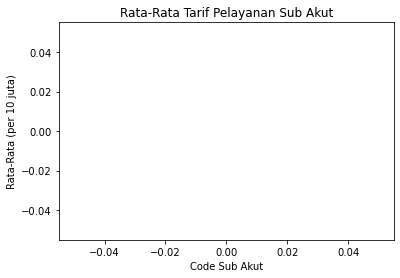

In [ ]:
# barplot
x = df_sub['FKL33']
y = df_sub['mean']

plt.bar(x,y)
plt.title("Rata-Rata Tarif Pelayanan Sub Akut")
plt.xlabel('Code Sub Akut')
plt.ylabel('Rata-Rata (per 10 juta)')

# 7. Special Drugs dan Distribusinya

In [ ]:
df_drug = df.groupby(['FKL44','FKL45','FKL46']).size().reset_index(name = 'count')
df_drug = df_drug.drop(labels = [0,23])
df_drug = df_drug.sort_values('count', ascending = False)
df_drug.head()

,FKL44,FKL45,FKL46,count
15,DD-05-II,HUMAN ALBUMIN FOR SEPTICAEMIA,1968700.00,30
8,DD-01-I,STREPTOKINASE,3140200.00,20
19,DD-05-II,HUMAN ALBUMIN FOR SEPTICAEMIA,2109900.00,11
18,DD-05-II,HUMAN ALBUMIN FOR SEPTICAEMIA,2027800.00,9
16,DD-05-II,HUMAN ALBUMIN FOR SEPTICAEMIA,1992300.00,6


In [ ]:
df_sd = df_drug.groupby(['FKL44']).agg({'count' : 'sum'}).reset_index()
df_sd = df_sd.sort_values('count', ascending = False)
df_sd

,FKL44,count
2,DD-05-II,75
0,DD-01-I,47
3,DD-07-II,4
1,DD-04-II,2
4,DD-09-II,2


Text(0, 0.5, 'Count')

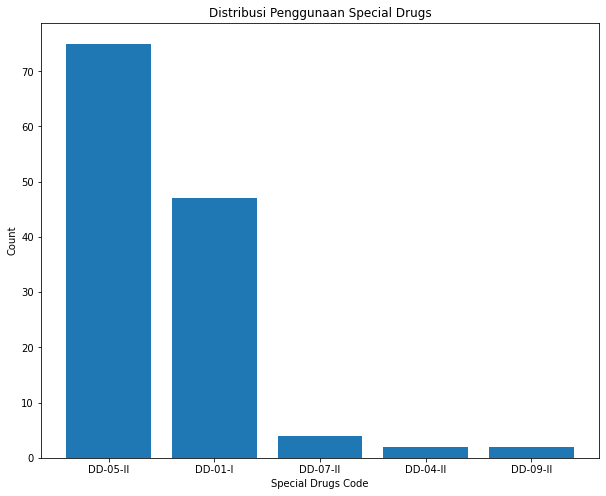

In [ ]:
plt.figure(figsize= (10,8))
x = df_sd['FKL44']
y = df_sd['count']

plt.bar(x,y)
plt.title('Distribusi Penggunaan Special Drugs')
plt.xlabel('Special Drugs Code')
plt.ylabel('Count')

# 8. Distribusi Spesial Prosedur dan Tarifnya

In [ ]:
df_spesial_prosedur = df.groupby(['FKL35','FKL36','FKL37']).size().reset_index(name = "jumlah")
df_spesial_prosedur = df_spesial_prosedur.sort_values('jumlah', ascending = False)
df_spesial_prosedur = df_spesial_prosedur.drop(labels = [0,1])
df_spesial_prosedur.reset_index()

df_spesial_prosedur['FKL36'] = df_spesial_prosedur['FKL36'].str.upper()

In [ ]:
df_spesial_prosedur['FKL35'].unique()

array(['YY-10-III', 'YY-02-III', 'YY-09-III', 'YY-01-II', 'YY-11-III',
       'YY-06-III', 'YY-07-III'], dtype=object)

In [ ]:
df_spesial_prosedur = df_spesial_prosedur.sort_values('FKL35')
df_spesial_prosedur.head(25)

,FKL35,FKL36,FKL37,jumlah
9,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5681500.00,9
13,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5951000.00,4
16,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13256200.00,5
2,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4294000.00,3
15,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13216900.00,8
6,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4475900.00,3
11,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5782600.00,13
4,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4422900.00,16
14,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13099000.00,24
7,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5614100.00,35


In [ ]:
# Use the `if` clause and logical conditions to set the new values
mask = (df_spesial_prosedur['FKL35'] == 'YY-02-II') & (df_spesial_prosedur['FKL36'] == 'HIP REPLACEMENT / KNEE REPLACEMENT')

df_spesial_prosedur.loc[mask, 'FKL35'] = 'YY-02-III'
df_spesial_prosedur.loc[mask, 'FKL36'] = 'PCI'
df_spesial_prosedur.head(60)

,FKL35,FKL36,FKL37,jumlah
9,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5681500.00,9
13,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5951000.00,4
16,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13256200.00,5
2,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4294000.00,3
15,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13216900.00,8
6,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4475900.00,3
11,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5782600.00,13
4,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4422900.00,16
14,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13099000.00,24
7,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5614100.00,35


In [ ]:
# Use the `if` clause and logical conditions to set the new values
mask = (df_spesial_prosedur['FKL35'] == 'YY-03-III') & (df_spesial_prosedur['FKL36'] == 'PCI')

df_spesial_prosedur.loc[mask, 'FKL35'] = 'YY-03-III'
df_spesial_prosedur.loc[mask, 'FKL36'] = 'KERATOPLASTY'
df_spesial_prosedur.head(60)

,FKL35,FKL36,FKL37,jumlah
9,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5681500.00,9
13,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5951000.00,4
16,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13256200.00,5
2,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4294000.00,3
15,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13216900.00,8
6,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4475900.00,3
11,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5782600.00,13
4,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,4422900.00,16
14,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,13099000.00,24
7,YY-01-II,HIP REPLACEMENT / KNEE REPLACEMENT,5614100.00,35


In [ ]:
# Use the `if` clause and logical conditions to set the new values
mask = (df_spesial_prosedur['FKL35'] == 'YY-07-III') & (df_spesial_prosedur['FKL36'] == 'STEREOTACTIC SURGERY & RADIOTHERAPHY')

df_spesial_prosedur.loc[mask, 'FKL35'] = 'YY-07-III'
df_spesial_prosedur.loc[mask, 'FKL36'] = 'TORAKOTOMI'
df_spesial_prosedur.tail(60)

,FKL35,FKL36,FKL37,jumlah
26,YY-02-III,PCI,11015400.00,3
22,YY-02-III,PCI,10694600.00,12
19,YY-02-III,PCI,10413400.00,51
25,YY-02-III,PCI,10854500.00,15
32,YY-02-III,PCI,22860800.00,45
28,YY-02-III,PCI,14564000.00,66
29,YY-02-III,PCI,14607300.00,44
17,YY-02-III,PCI,7957600.00,37
21,YY-02-III,PCI,10538400.00,23
18,YY-02-III,PCI,8172500.00,1


In [ ]:
# Use the `if` clause and logical conditions to set the new values
mask = (df_spesial_prosedur['FKL35'] == 'YY-13-III') & (df_spesial_prosedur['FKL36'] == 'PHACOEMULSIFICATION')

df_spesial_prosedur.loc[mask, 'FKL35'] = 'YY-13-III'
df_spesial_prosedur.loc[mask, 'FKL36'] = 'COIL'

In [ ]:
df_spesial_prosedur = df_spesial_prosedur[['FKL36','FKL37','jumlah']]
df_spesial_prosedur = df_spesial_prosedur.groupby(['FKL36']).agg({'FKL37' : 'sum', 'jumlah' : 'sum'}).reset_index()
df_spesial_prosedur['mean'] = df_spesial_prosedur['FKL37'] / df_spesial_prosedur['jumlah']
df_spesial_prosedur

,FKL36,FKL37,jumlah,mean
0,HIP REPLACEMENT / KNEE REPLACEMENT,101871900.00,129,789704.65
1,MICROLARINGOSCOPY,3599000.00,25,143960.00
2,PCI,204847100.00,660,310374.39
3,PHACOEMULSIFICATION,100779100.00,944,106757.52
4,STEREOTACTIC SURGERY & RADIOTHERAPHY,10021800.00,23,435730.43
5,TORAKOTOMI,10142700.00,2,5071350.00
6,VITRECTOMY,103260400.00,242,426695.87


In [ ]:
df_spesial_p = df_spesial_prosedur.sort_values('mean', ascending = False)
df_spesial_p

,FKL36,FKL37,jumlah,mean
5,TORAKOTOMI,10142700.00,2,5071350.00
0,HIP REPLACEMENT / KNEE REPLACEMENT,101871900.00,129,789704.65
4,STEREOTACTIC SURGERY & RADIOTHERAPHY,10021800.00,23,435730.43
6,VITRECTOMY,103260400.00,242,426695.87
2,PCI,204847100.00,660,310374.39
1,MICROLARINGOSCOPY,3599000.00,25,143960.00
3,PHACOEMULSIFICATION,100779100.00,944,106757.52


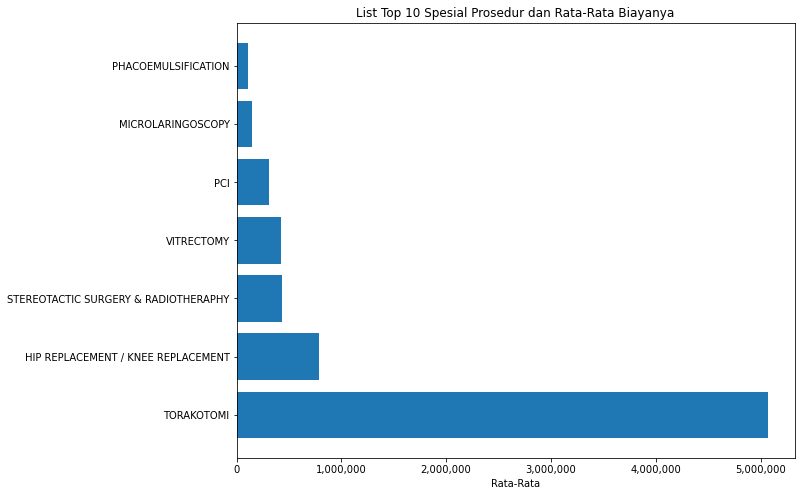

In [ ]:
# plotting

import matplotlib.ticker as ticker
plt.figure(figsize=(10,8))
x = df_spesial_p['FKL36']
y = df_spesial_p['mean']

plt.barh(x,y)
plt.title('List Top 10 Spesial Prosedur dan Rata-Rata Biayanya')
plt.xlabel('Rata-Rata')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [ ]:
df_status_kepesertaan = df.groupby(['PSTV17']).size().reset_index(name = "count")

In [ ]:
dictpstv17 = {
    1.0 : 'Aktif',
    2.0 : 'Meninggal',
    3.0 : 'Keluar / PHK',
    99.0 : 'Missing'
}

In [ ]:
df['PSTV17'] = df['PSTV17'].map(dictpstv17)

# 10. KPI peserta AKTIF

In [ ]:
df_status_kepesertaan.sort_values('count', ascending = False)

,PSTV17,count
0,1.00,1123257
1,2.00,61233
2,3.00,18419
3,99.00,1


In [ ]:
# Assuming df_status['count'] is a list or a pandas Series
total_counts = sum(df_status_kepesertaan['count'][0:4])  # Sum of count[0], count[1], count[2], count[3], and count[4]
df_status_kepesertaan = df_status_kepesertaan['count'][0] / total_counts
df_status_kepesertaan = df_status_kepesertaan * 100
df_status_kepesertaan

93.37830760406015

In [ ]:
rounded_value = round(df_status_kepesertaan, 2)

In [ ]:
print("Ada sekitar " + str(rounded_value) + "%" + " Peserta BPJS yang aktif")

Ada sekitar 93.38% Peserta BPJS yang aktif


# 11. persebaran jenis kelamin pasien

In [ ]:
dictpstv05 = {
    1.0 : 'Laki-Laki',
    2.0 : 'Perempuan'
}

In [ ]:
df['PSTV05'] = df['PSTV05'].map(dictpstv05)

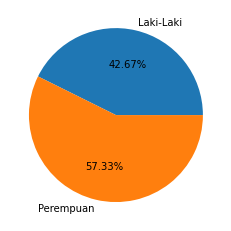

In [ ]:
df_gender = df.groupby(['PSTV05']).size().reset_index(name = "count")
df_gender

y = df_gender['count']
mylabels = df_gender['PSTV05']

plt.pie(y, labels = mylabels, autopct = '%.2f%%')
plt.show()

# 12. Top 10 Kode Diagnosis Primer dan diagnosisnya"

In [ ]:
df_diagnosis = df.groupby(['FKL17A','FKL18A']).size().reset_index(name = 'count')
df_diagnosis = df_diagnosis.sort_values('count', ascending = False)
top_diagnosis = df_diagnosis.head(10)
top_diagnosis

,FKL17A,FKL18A,count
2039,Z09,Follow-up examination after other treatment fo...,871304
2093,Z49,Extracorporeal dialysis,46128
2103,Z50,Other physical therapy,37957
2044,Z09,Follow-up examination after unspecified treatm...,23178
2175,Z86,"Personal history of endocrine, nutritional and...",17767
2228,Z99,Dependence on renal dialysis,9503
2152,Z76,Issue of repeat prescription,8924
345,E11,Non-insulin-dependent diabetes mellitus withou...,8904
2038,Z09,Follow-up examination after combined treatment...,8084
2173,Z86,Personal history of diseases of the circulator...,7427


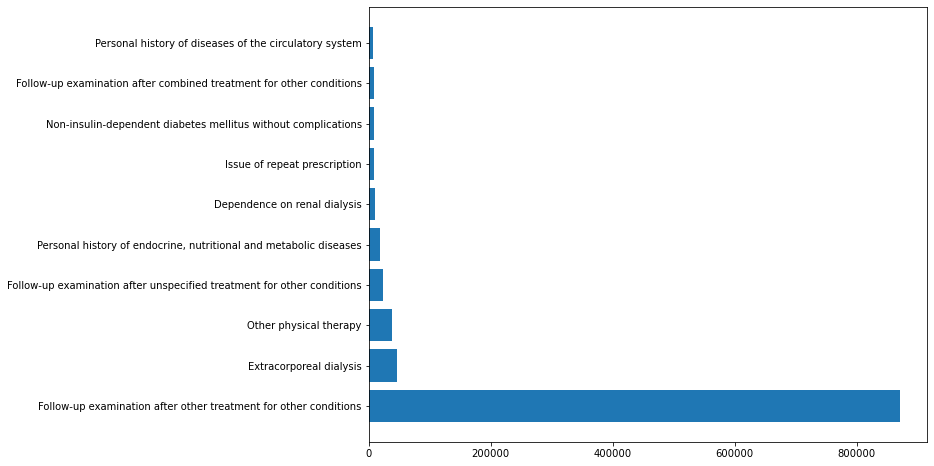

In [ ]:
# plotting
plt.figure(figsize = (10,8))
x = top_diagnosis['FKL18A']
y = top_diagnosis['count']

plt.barh(x,y)
plt.show()

# 13. Sepuluh Klaim INA-CBG terbanyak pelayanan FKRTL DM

In [ ]:
df_ina_cbg = df.groupby(['FKL19','FKL19A']).size().reset_index(name = 'count')
df_ina_cbg = df_ina_cbg.sort_values('count', ascending = False)
df_ina_cbg.head(10)

,FKL19,FKL19A,count
570,Q-5-44-0,PENYAKIT KRONIS KECIL LAIN-LAIN,884533
517,N-3-15-0,PROSEDUR DIALISIS,77203
464,M-3-16-0,PROSEDUR THERAPI FISIK DAN PROSEDUR KECIL MUSK...,53441
197,H-3-12-0,PROSEDUR LAIN-LAIN PADA MATA,21327
546,Q-5-18-0,KONSULTASI ATAU PEMERIKSAAN LAIN-LAIN,18951
673,Z-3-12-0,PROSEDUR REHABILITASI,14985
687,Z-3-27-0,PERAWATAN LUKA,14280
683,Z-3-23-0,PROSEDUR ULTRASOUND LAIN-LAIN,9351
459,M-3-11-0,PROSEDUR DIAGNOSTIK DAN TERAPEUTIK MUSKULOSKEL...,7551
238,I-3-13-0,PROSEDUR EKOKARDIOGRAFI,6507


In [ ]:
top_ina_cbg = df_ina_cbg.head(10)
top_ina_cbg

,FKL19,FKL19A,count
570,Q-5-44-0,PENYAKIT KRONIS KECIL LAIN-LAIN,884533
517,N-3-15-0,PROSEDUR DIALISIS,77203
464,M-3-16-0,PROSEDUR THERAPI FISIK DAN PROSEDUR KECIL MUSK...,53441
197,H-3-12-0,PROSEDUR LAIN-LAIN PADA MATA,21327
546,Q-5-18-0,KONSULTASI ATAU PEMERIKSAAN LAIN-LAIN,18951
673,Z-3-12-0,PROSEDUR REHABILITASI,14985
687,Z-3-27-0,PERAWATAN LUKA,14280
683,Z-3-23-0,PROSEDUR ULTRASOUND LAIN-LAIN,9351
459,M-3-11-0,PROSEDUR DIAGNOSTIK DAN TERAPEUTIK MUSKULOSKEL...,7551
238,I-3-13-0,PROSEDUR EKOKARDIOGRAFI,6507


Text(0.5, 1.0, 'Sepuluh Klaim INA-CBG terbanyak pelayanan FKRTL DM')

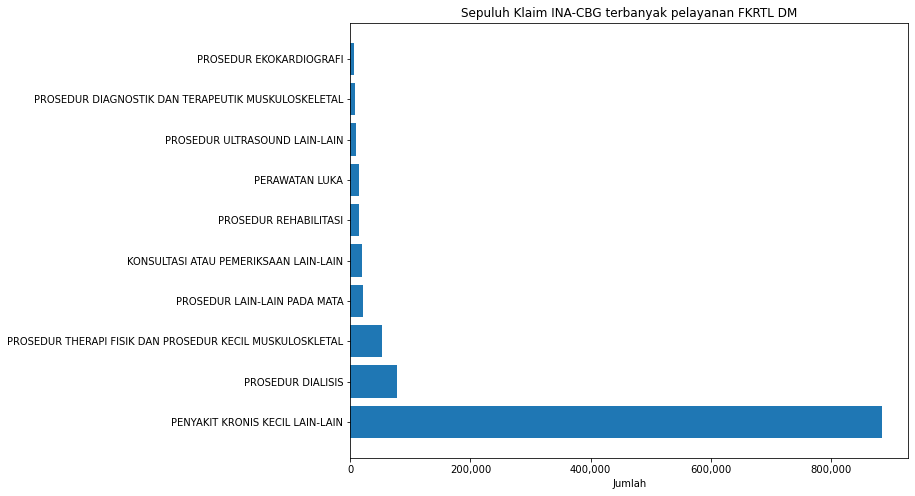

In [ ]:
# Plotting
plt.figure(figsize = (10,8))

x = top_ina_cbg['FKL19A']
y = top_ina_cbg['count']

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.barh(x,y)
plt.xlabel('Jumlah')
plt.title('Sepuluh Klaim INA-CBG terbanyak pelayanan FKRTL DM')

# 14. Kunjungan Faskes Pertahun

In [ ]:
dictjenis_faskes = {
    1.0 : 'Rumah sakit',
    2.0 : 'Klinik Utama',
    3.0 : 'Klinik Pratama'
}

In [ ]:
df['FKL08'] = df['FKL08'].map(dictjenis_faskes)

In [ ]:
df_kunjungan_faskes = df.groupby(['FKL08','Tahun']).size().reset_index(name = 'count')

In [ ]:
df_kunjungan_faskes

,FKL08,Tahun,count
0,Klinik Utama,2021,28873
1,Rumah sakit,2021,1174037


Text(0.5, 1.0, 'Kunjungan Faskes Tahun 2021')

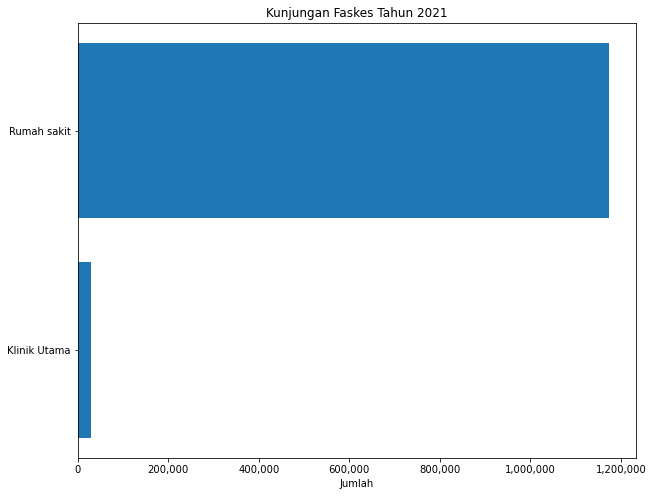

In [ ]:
# Plotting
plt.figure(figsize = (10,8))

x = df_kunjungan_faskes['FKL08']
y = df_kunjungan_faskes['count']

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.barh(x,y)
plt.xlabel('Jumlah')
plt.title('Kunjungan Faskes Tahun 2021')

In [ ]:
data = {}
facilities = ['Klinik Pratama', 'Klinik Utama', 'Rumah sakit']

# Initialize dictionaries for each facility
for facility in facilities:
    data[facility] = {}

# Iterate through the DataFrame rows and populate the data dictionary
for index, row in df_kunjungan_faskes.iterrows():
    facility = row['FKL08']
    year = row['Tahun']
    count = row['count']

    if facility == 'Klinik Pratama':
        data['Klinik Pratama'][year] = count
    elif facility == 'Klinik Utama':
        data['Klinik Utama'][year] = count
    elif facility == 'Rumah sakit':
        data['Rumah sakit'][year] = count

# Adding missing keys with zero values
for facility in facilities:
    for year in df_kunjungan_faskes['Tahun'].unique():
        if year not in data[facility]:
            data[facility][year] = 0

# Optional: Sort the inner dictionaries by year
for facility in facilities:
    data[facility] = dict(sorted(data[facility].items()))

data



{'Klinik Pratama': {'2021': 0},
 'Klinik Utama': {'2021': 28873},
 'Rumah sakit': {'2021': 1174037}}

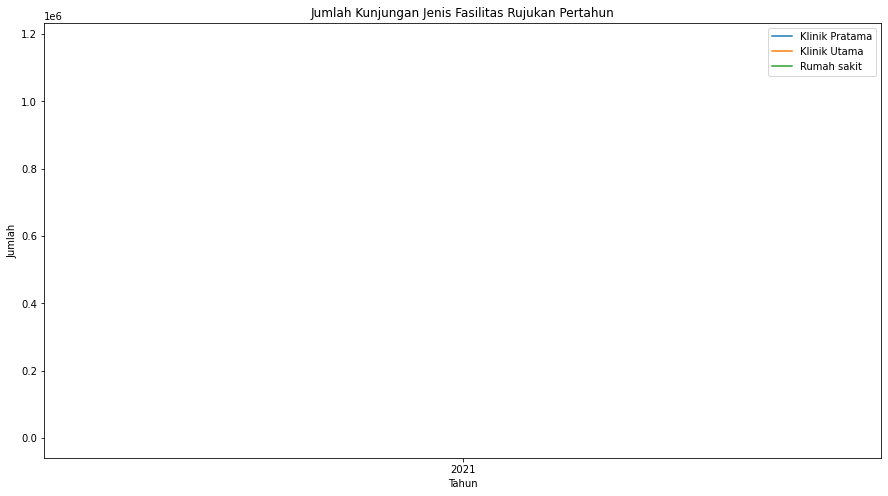

In [ ]:
years = df_kunjungan_faskes['Tahun'].unique()
years.sort()  # Sort the unique years in ascending order

plt.figure(figsize=(15, 8))
for category in data:
    plt.plot(years, [data[category][year] for year in years], label=category)

# Customize plot
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Jumlah Kunjungan Jenis Fasilitas Rujukan Pertahun')
plt.legend()

# Show plot
plt.show()


In [ ]:
# klinik utama
klinik_utama = df_kunjungan_faskes[df_kunjungan_faskes['FKL08'] == 'Klinik Utama']

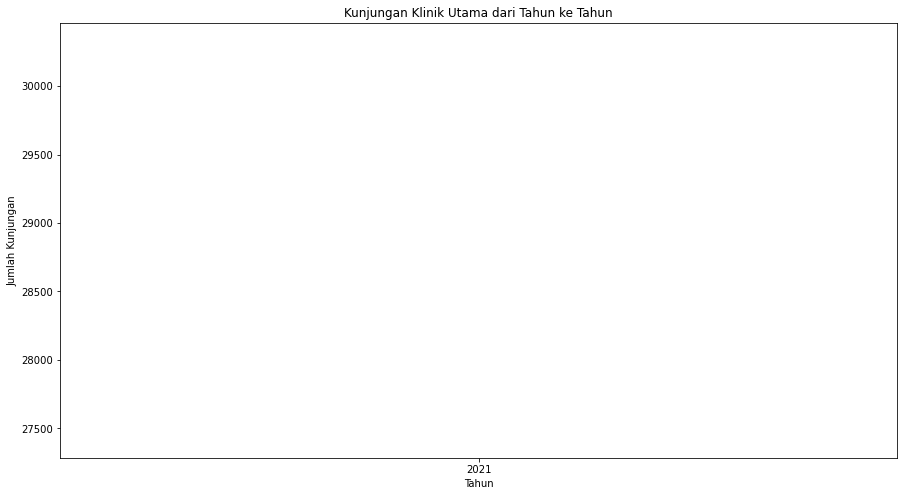

In [ ]:
plt.figure(figsize=(15,8))

x = klinik_utama['Tahun']
y = klinik_utama['count']

sns.lineplot(x=x,y=y)
plt.title("Kunjungan Klinik Utama dari Tahun ke Tahun")
plt.ylabel('Jumlah Kunjungan')
plt.xlabel('Tahun')
plt.show()

In [ ]:
# klinik utama
Rumah_Sakit = df_kunjungan_faskes[df_kunjungan_faskes['FKL08'] == 'Rumah sakit']

In [ ]:
plt.figure(figsize=(15,8))

x = Rumah_Sakit['Tahun']
y = Rumah_Sakit['count']

sns.lineplot(x=x,y=y, color ='red')
plt.title("Kunjungan Rumah Sakit dari Tahun ke Tahun")
plt.ylabel('Jumlah Kunjungan')
plt.xlabel('Tahun')
plt.show()

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plot Rumah_Sakit in the first subplot (ax1)
x1 = Rumah_Sakit['Tahun']
y1 = Rumah_Sakit['count']
sns.lineplot(x=x1, y=y1, color='red', ax=ax1)
ax1.set_title("Kunjungan Rumah Sakit dari Tahun ke Tahun")
ax1.set_ylabel('Jumlah Kunjungan')
ax1.set_xlabel('Tahun')

# Plot Klinik_Utama in the second subplot (ax2)
x2 = klinik_utama['Tahun']
y2 = klinik_utama['count']
sns.lineplot(x=x2, y=y2, color='blue', ax=ax2)
ax2.set_title("Kunjungan Klinik Utama dari Tahun ke Tahun")
ax2.set_ylabel('Jumlah Kunjungan')
ax2.set_xlabel('Tahun')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 15. Hubungan Keluarga Peserta BPJS Pasien FKRTL TB

In [ ]:
dictpstv04 = {
    1.0 : 'Peserta',
    2.0 : 'Suami Peserta',
    3.0 : 'Istri Peserta',
    4.0 : 'Anak Peserta',
    5.0 : 'Keluarga Tambahan Peserta'

}

In [ ]:
df['PSTV04'] = df['PSTV04'].map(dictpstv04)

In [ ]:
df_peserta = df.groupby(['PSTV04']).size().reset_index(name = 'count')
df_peserta = df_peserta.sort_values('count', ascending = False)
df_peserta

,PSTV04,count
3,Peserta,743835
1,Istri Peserta,359317
4,Suami Peserta,53831
2,Keluarga Tambahan Peserta,38032
0,Anak Peserta,7895


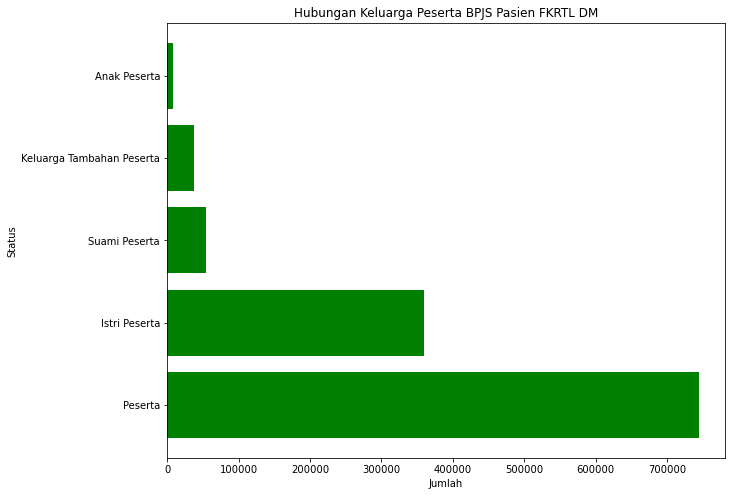

In [ ]:
plt.figure(figsize = (10,8))
x = df_peserta['PSTV04']
y = df_peserta['count']

plt.barh(x,y, color = 'green')
plt.title('Hubungan Keluarga Peserta BPJS Pasien FKRTL DM')
plt.xlabel('Jumlah')
plt.ylabel('Status')

plt.show()

# 16. Status Perkawinan Peserta BPJS Pasien FKRTL TB

In [ ]:
dictperkawinan = {
    1.0 : 'Belum kawin',
    2.0 : 'Kawin',
    3.0 : 'Cerai',
    9.0 : 'Tidak terdefinisi'

}

In [ ]:
df['PSTV06'] = df['PSTV06'].map(dictperkawinan)

In [ ]:
df_perkawinan = df.groupby(['PSTV06']).size().reset_index(name = 'count')
df_perkawinan = df_perkawinan.sort_values('count', ascending = False)
df_perkawinan

,PSTV06,count
2,Kawin,1013396
1,Cerai,126246
0,Belum kawin,63268


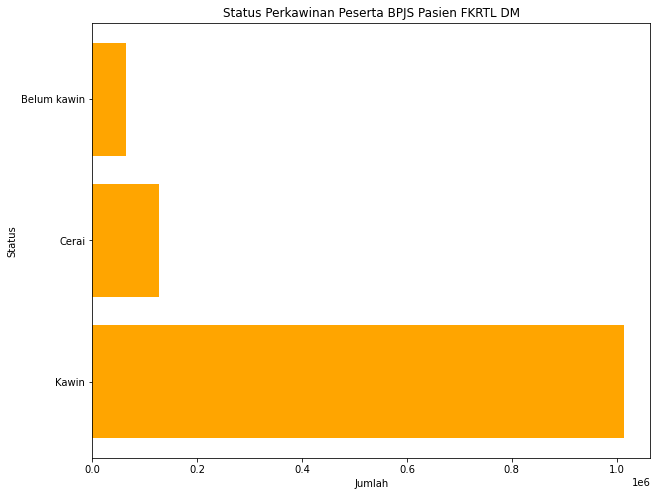

In [ ]:
plt.figure(figsize = (10,8))
x = df_perkawinan['PSTV06']
y = df_perkawinan['count']

plt.barh(x,y, color = 'orange')
plt.title('Status Perkawinan Peserta BPJS Pasien FKRTL DM')
plt.xlabel('Jumlah')
plt.ylabel('Status')

plt.show()

# 17. Distribusi Kepemilikan Faskes (bisa ditambah tahun untuk melihat pertumbuhan faskes)

In [ ]:
dictkepemilikan = {
    1: 'Vertikal',
    2: 'PemProv',
    3: 'PemKab',
    4: 'POLRI',
    5: 'TNI AD',
    6: 'TNI AL',
    7: 'TNI AU',
    8: 'BUMN',
    9: 'Swasta'
}

In [ ]:
df['FKL07'] = df['FKL07'].map(dictkepemilikan)

In [ ]:

df_kepemilikan = df.groupby(['FKL07']).size().reset_index(name = 'count')
df_kepemilikan = df_kepemilikan.sort_values('count', ascending = False)
df_kepemilikan

,FKL07,count
4,Swasta,676220
2,PemKab,304798
3,PemProv,81662
8,Vertikal,51136
5,TNI AD,34480
0,BUMN,24916
1,POLRI,18610
7,TNI AU,6994
6,TNI AL,4094


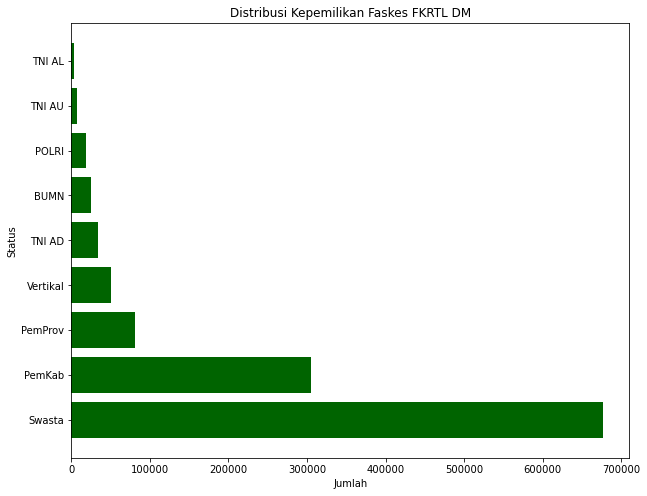

In [ ]:
plt.figure(figsize = (10,8))
x = df_kepemilikan['FKL07']
y = df_kepemilikan['count']

plt.barh(x,y, color = 'darkgreen')
plt.title('Distribusi Kepemilikan Faskes FKRTL DM')
plt.xlabel('Jumlah')
plt.ylabel('Status')

plt.show()